<a href="https://colab.research.google.com/github/Just1got/Hello_python/blob/main/practise_alternate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Плотное векторное представление слов для определения тональности текста отзывов на фильмы из IMDb (Internet Movie Database) 



## Набор данных IMDb movie review

[Набор данных IMDb movie review](https://ai.stanford.edu/~amaas/data/sentiment/) создан для задач определения тональности текста. Набор включает отзывы на фильмы с сайта [IMDb](https://www.imdb.com). Отзывы только явно положительные (оценка >= 7) или отрицательные (оценка <= 4), нейтральные отзывы в набор данных не включались.

Размер набора данных 50 тыс. отзывов:
- Набор данных для обучения - 25 тыс. отзывов
- Набор данных для тестирования - 25 тыс. отзывов

Количество положительных и отрицательных отзывов одинаковое.

Разметка набора данных:
- 0 - отзыв отрицательный
- 1 - отзыв положительный

С точки зрения машинного обучения это задача бинарной классификации.



In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
%matplotlib inline 

## Загружаем данные

In [ ]:
max_words=10000 

In [ ]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

## Просмотр данных

Рецензия

In [ ]:
x_train[100]

[1,
 13,
 244,
 6,
 87,
 337,
 7,
 628,
 2219,
 5,
 28,
 285,
 15,
 240,
 93,
 23,
 288,
 549,
 18,
 1455,
 673,
 4,
 241,
 534,
 3635,
 8448,
 20,
 38,
 54,
 13,
 258,
 46,
 44,
 14,
 13,
 1241,
 7258,
 12,
 5,
 5,
 51,
 9,
 14,
 45,
 6,
 762,
 7,
 2,
 1309,
 328,
 5,
 428,
 2473,
 15,
 26,
 1292,
 5,
 3939,
 6728,
 5,
 1960,
 279,
 13,
 92,
 124,
 803,
 52,
 21,
 279,
 14,
 9,
 43,
 6,
 762,
 7,
 595,
 15,
 16,
 2,
 23,
 4,
 1071,
 467,
 4,
 403,
 7,
 628,
 2219,
 8,
 97,
 6,
 171,
 3596,
 99,
 387,
 72,
 97,
 12,
 788,
 15,
 13,
 161,
 459,
 44,
 4,
 3939,
 1101,
 173,
 21,
 69,
 8,
 401,
 2,
 4,
 481,
 88,
 61,
 4731,
 238,
 28,
 32,
 11,
 32,
 14,
 9,
 6,
 545,
 1332,
 766,
 5,
 203,
 73,
 28,
 43,
 77,
 317,
 11,
 4,
 2,
 953,
 270,
 17,
 6,
 3616,
 13,
 545,
 386,
 25,
 92,
 1142,
 129,
 278,
 23,
 14,
 241,
 46,
 7,
 158]

Правильный ответ

In [ ]:
y_train[100]

0

## Подготовка данных для обучения

In [ ]:
maxlen = 200

In [ ]:
x_train = pad_sequences(x_train, maxlen=maxlen, padding='post')
x_test = pad_sequences(x_test, maxlen=maxlen, padding='post')

In [ ]:
x_train[1]

array([   1,  194, 1153,  194, 8255,   78,  228,    5,    6, 1463, 4369,
       5012,  134,   26,    4,  715,    8,  118, 1634,   14,  394,   20,
         13,  119,  954,  189,  102,    5,  207,  110, 3103,   21,   14,
         69,  188,    8,   30,   23,    7,    4,  249,  126,   93,    4,
        114,    9, 2300, 1523,    5,  647,    4,  116,    9,   35, 8163,
          4,  229,    9,  340, 1322,    4,  118,    9,    4,  130, 4901,
         19,    4, 1002,    5,   89,   29,  952,   46,   37,    4,  455,
          9,   45,   43,   38, 1543, 1905,  398,    4, 1649,   26, 6853,
          5,  163,   11, 3215,    2,    4, 1153,    9,  194,  775,    7,
       8255,    2,  349, 2637,  148,  605,    2, 8003,   15,  123,  125,
         68,    2, 6853,   15,  349,  165, 4362,   98,    5,    4,  228,
          9,   43,    2, 1157,   15,  299,  120,    5,  120,  174,   11,
        220,  175,  136,   50,    9, 4373,  228, 8255,    5,    2,  656,
        245, 2350,    5,    4, 9837,  131,  152,  4

In [ ]:
y_train[1]

0

## Создание нейронной сети

In [ ]:
model = Sequential()
model.add(Embedding(max_words, 2, input_length=maxlen))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

## Обучаем нейронную сеть

In [ ]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=15,
                    batch_size=128,
                    validation_split=0.1)

Epoch 1/15
176/176 [==============================] - 2s 7ms/step - loss: 0.6906 - accuracy: 0.5317 - val_loss: 0.6823 - val_accuracy: 0.6160
Epoch 2/15
176/176 [==============================] - 1s 7ms/step - loss: 0.6161 - accuracy: 0.7206 - val_loss: 0.5307 - val_accuracy: 0.7756
Epoch 3/15
176/176 [==============================] - 1s 6ms/step - loss: 0.4405 - accuracy: 0.8321 - val_loss: 0.3968 - val_accuracy: 0.8468
Epoch 4/15
176/176 [==============================] - 2s 9ms/step - loss: 0.3451 - accuracy: 0.8665 - val_loss: 0.3465 - val_accuracy: 0.8620
Epoch 5/15
176/176 [==============================] - 2s 10ms/step - loss: 0.2945 - accuracy: 0.8904 - val_loss: 0.3216 - val_accuracy: 0.8712
Epoch 6/15
176/176 [==============================] - 1s 7ms/step - loss: 0.2651 - accuracy: 0.8999 - val_loss: 0.3101 - val_accuracy: 0.8764
Epoch 7/15
176/176 [==============================] - 1s 6ms/step - loss: 0.2425 - accuracy: 0.9076 - val_loss: 0.2988 - val_accuracy: 0.8792
Epoch

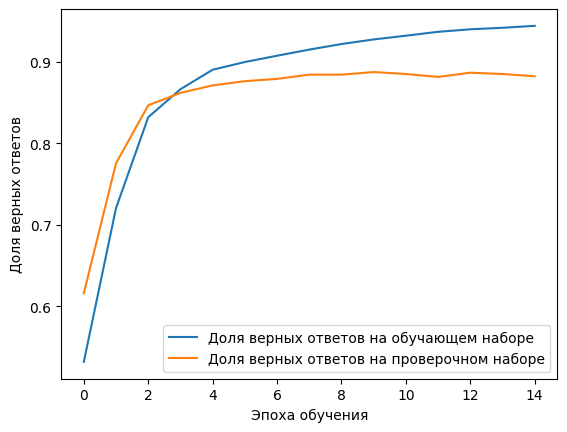

In [ ]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Проверяем работу сети на тестовом наборе данных

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=1)

782/782 [==============================] - 1s 1ms/step - loss: 0.3035 - accuracy: 0.8731


## Исследуем обученное плотное векторное представление слов

**Получаем матрицу плотных векторных представлений слов**

In [ ]:
embedding_matrix = model.layers[0].get_weights()[0]

In [ ]:
embedding_matrix[:5]

array([[ 0.01508784,  0.02052341],
       [ 0.11042845, -0.07909299],
       [ 0.03679997, -0.01296855],
       [ 0.03732416,  0.02346594],
       [-0.03999418,  0.00748394]], dtype=float32)

**Загружаем словарь с номерами слов**

In [ ]:
word_index_org = imdb.get_word_index()

Дополняем словарь служебными символами

In [ ]:
word_index = dict()
for word,number in word_index_org.items():
    word_index[word] = number + 3
word_index["<Заполнитель>"] = 0
word_index["<Начало последовательности>"] = 1
word_index["<Неизвестное слово>"] = 2  
word_index["<Не используется>"] = 3

**Ищем векторы для слов**

In [ ]:
word = 'good'
word_number = word_index[word]
print('Номер слова', word_number)
print('Вектор для слова', embedding_matrix[word_number])

Номер слова 52
Вектор для слова [-0.2403293   0.11352387]


## Сохраняем обученные плотные векторные представления в файл

**Составляем реверсивный словарь токенов (слов)**

In [ ]:
reverse_word_index = dict()
for key, value in word_index.items():
    reverse_word_index[value] = key

**Записываем плотные векторные представления в файл**

In [ ]:
filename = 'imdb_embeddings.csv'

In [ ]:
with open(filename, 'w') as f:
    for word_num in range(max_words):
      word = reverse_word_index[word_num]
      vec = embedding_matrix[word_num]
      f.write(word + ",")
      f.write(','.join([str(x) for x in vec]) + "\n")
#files.download('imdb_embeddings.csv')

In [ ]:
!head -n 55 $filename

<Заполнитель>,0.015087842,0.020523414
<Начало последовательности>,0.110428445,-0.079092994
<Неизвестное слово>,0.03679997,-0.012968548
<Не используется>,0.037324164,0.023465943
the,-0.039994184,0.0074839387
and,-0.097284496,0.030586015
a,-0.019744175,-0.01653283
of,0.028136667,-0.0037466655
to,-0.0035428256,-0.008845311
is,-0.07001497,0.02172743
br,0.0037297087,-0.04236774
in,-0.017786076,0.01190535
it,-0.031486157,0.091783136
i,0.002246019,0.02994518
this,0.01667372,-0.021755487
that,-0.001055484,-0.0048603197
was,0.017591588,-0.06862871
as,-0.017683772,-0.019470569
for,0.027580721,-0.005389625
with,-0.05023386,-0.0378323
movie,0.025244042,-0.028322829
but,0.027211472,0.03669574
film,-0.048781235,-0.011433231
on,0.03607523,-0.03379887
not,0.11790443,-0.10117671
you,-0.07848665,0.16361873
are,0.07732501,0.0014410038
his,-0.03855928,0.011991522
have,0.04690874,-0.031251296
he,-0.009326618,-0.0052044634
be,-0.00873404,-0.108764164
one,0.018789869,-0.011158695
all,-0.06823445,-0.001958775

## Визуализация плотных векторных представлений слов

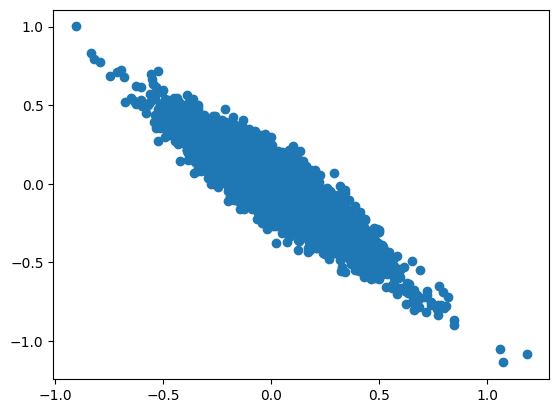

In [ ]:
plt.scatter(embedding_matrix[:,0], embedding_matrix[:,1])

Выбираем коды слов, по которым можно определить тональность отзыва

In [ ]:
review = ['brilliant', 'fantastic', 'amazing', 'good',
          'bad', 'awful','crap', 'terrible', 'trash']
enc_review = []
for word in review:
    enc_review.append(word_index[word])
enc_review

[530, 777, 480, 52, 78, 373, 595, 394, 1157]

Получаем векторное представление интересующих нас слов

In [ ]:
review_vectors = embedding_matrix[enc_review]
review_vectors

array([[-0.4690429 ,  0.45878768],
       [-0.59594744,  0.5104198 ],
       [-0.544276  ,  0.63295084],
       [-0.2403293 ,  0.11352387],
       [ 0.5331781 , -0.4346863 ],
       [ 1.061333  , -1.0544336 ],
       [ 0.4633353 , -0.6068007 ],
       [ 0.6535425 , -0.75306964],
       [ 0.14779517, -0.20543317]], dtype=float32)

Визуализация обученного плотного векторного представления слов, по которым можно определить эмоциональную окраску текста

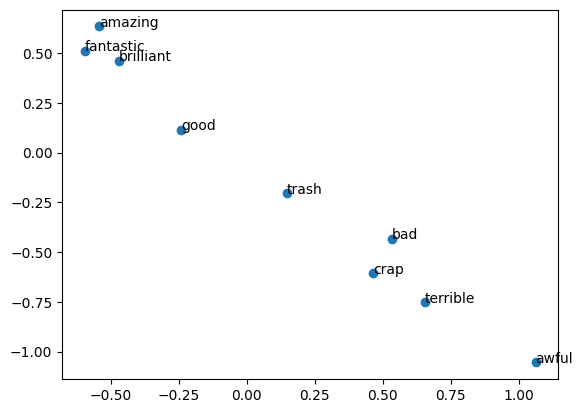

In [ ]:
plt.scatter(review_vectors[:,0], review_vectors[:,1])
for i, txt in enumerate(review):
    plt.annotate(txt, (review_vectors[i,0], review_vectors[i,1]))

# Определение тональности текстов отзывов на сайте YELP сетью LSTM



In [ ]:
%tensorflow_version 2.x
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GRU, LSTM
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
num_words = 10000
max_review_len = 100

## Загрузка набора данных

In [ ]:
!wget https://www.dropbox.com/s/ufbhk3kadtnn6h0/yelp_review_polarity_csv.tgz?dl=1 -O yelp_review_polarity_csv.tgz

--2023-04-27 11:29:17--  https://www.dropbox.com/s/ufbhk3kadtnn6h0/yelp_review_polarity_csv.tgz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/ufbhk3kadtnn6h0/yelp_review_polarity_csv.tgz [following]
--2023-04-27 11:29:17--  https://www.dropbox.com/s/dl/ufbhk3kadtnn6h0/yelp_review_polarity_csv.tgz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca59b02763716c211b6394caf59.dl.dropboxusercontent.com/cd/0/get/B69exRJ6ZiXcsOhV0NjQEkZY_0ME_tZ7QoCs4WZyIqWxRuPFmo1Z02pgHl8skOnbR7-N8PZhY7HpWwjgy4gB2E-qiUEIopK4PhSt_e6ehtPIK1EGsUSPc2ssqEH4YtguksPYUQ2AAoJPFbeQ8mtX2-GZ8N5hNYfHbALVwGkSMSYOwA/file?dl=1# [following]
--2023-04-27 11:29:18--  https://uca59b02763716c211b6394caf59.dl.dropboxusercontent.com/cd/0/get/B69exRJ6ZiXcsOhV0NjQEkZY_0ME_t

In [ ]:
!tar -xvf yelp_review_polarity_csv.tgz

yelp_review_polarity_csv/
yelp_review_polarity_csv/train.csv
yelp_review_polarity_csv/readme.txt
yelp_review_polarity_csv/test.csv


## Просматриваем данные

In [ ]:
!cat yelp_review_polarity_csv/readme.txt

Yelp Review Polarity Dataset

Version 1, Updated 09/09/2015

ORIGIN

The Yelp reviews dataset consists of reviews from Yelp. It is extracted from the Yelp Dataset Challenge 2015 data. For more information, please refer to http://www.yelp.com/dataset_challenge

The Yelp reviews polarity dataset is constructed by Xiang Zhang (xiang.zhang@nyu.edu) from the above dataset. It is first used as a text classification benchmark in the following paper: Xiang Zhang, Junbo Zhao, Yann LeCun. Character-level Convolutional Networks for Text Classification. Advances in Neural Information Processing Systems 28 (NIPS 2015).


DESCRIPTION

The Yelp reviews polarity dataset is constructed by considering stars 1 and 2 negative, and 3 and 4 positive. For each polarity 280,000 training samples and 19,000 testing samples are take randomly. In total there are 560,000 trainig samples and 38,000 testing samples. Negative polarity is class 1, and positive class 2.

The files train.csv and test.csv contain all the

In [ ]:
!head yelp_review_polarity_csv/train.csv

"1","Unfortunately, the frustration of being Dr. Goldberg's patient is a repeat of the experience I've had with so many other doctors in NYC -- good doctor, terrible staff.  It seems that his staff simply never answers the phone.  It usually takes 2 hours of repeated calling to get an answer.  Who has time for that or wants to deal with it?  I have run into this problem with many other doctors and I just don't get it.  You have office workers, you have patients with medical needs, why isn't anyone answering the phone?  It's incomprehensible and not work the aggravation.  It's with regret that I feel that I have to give Dr. Goldberg 2 stars."
"2","Been going to Dr. Goldberg for over 10 years. I think I was one of his 1st patients when he started at MHMG. He's been great over the years and is really all about the big picture. It is because of him, not my now former gyn Dr. Markoff, that I found out I have fibroids. He explores all options with you and is very patient and understanding. H

In [ ]:
!head yelp_review_polarity_csv/test.csv

"2","Contrary to other reviews, I have zero complaints about the service or the prices. I have been getting tire service here for the past 5 years now, and compared to my experience with places like Pep Boys, these guys are experienced and know what they're doing. \nAlso, this is one place that I do not feel like I am being taken advantage of, just because of my gender. Other auto mechanics have been notorious for capitalizing on my ignorance of cars, and have sucked my bank account dry. But here, my service and road coverage has all been well explained - and let up to me to decide. \nAnd they just renovated the waiting room. It looks a lot better than it did in previous years."
"1","Last summer I had an appointment to get new tires and had to wait a super long time. I also went in this week for them to fix a minor problem with a tire they put on. They \""fixed\"" it for free, and the very next morning I had the same issue. I called to complain, and the \""manager\"" didn't even apolog

In [ ]:
!wc -l yelp_review_polarity_csv/train.csv
!wc -l yelp_review_polarity_csv/test.csv

560000 yelp_review_polarity_csv/train.csv
38000 yelp_review_polarity_csv/test.csv


## Загружаем данные в память

Читаем данные из файла

In [ ]:
train = pd.read_csv('yelp_review_polarity_csv/train.csv', 
                    header=None, 
                    names=['Class', 'Review'])

In [ ]:
train

,Class,Review
0,1,"Unfortunately, the frustration of being Dr. Go..."
1,2,Been going to Dr. Goldberg for over 10 years. ...
2,1,I don't know what Dr. Goldberg was like before...
3,1,I'm writing this review to give you a heads up...
4,2,All the food is great here. But the best thing...
...,...,...
559995,2,Ryan was as good as everyone on yelp has claim...
559996,2,Professional \nFriendly\nOn time AND affordabl...
559997,1,Phone calls always go to voicemail and message...
559998,1,Looks like all of the good reviews have gone t...


Выделяем данные для обучения

In [ ]:
reviews = train['Review']

In [ ]:
reviews[:5]

0    Unfortunately, the frustration of being Dr. Go...
1    Been going to Dr. Goldberg for over 10 years. ...
2    I don't know what Dr. Goldberg was like before...
3    I'm writing this review to give you a heads up...
4    All the food is great here. But the best thing...
Name: Review, dtype: object

Выделяем правильные ответы

In [ ]:
y_train = train['Class'] - 1

In [ ]:
y_train

0         0
1         1
2         0
3         0
4         1
         ..
559995    1
559996    1
559997    0
559998    0
559999    1
Name: Class, Length: 560000, dtype: int64

## Токенизация текста

In [ ]:
reviews[:5]

0    Unfortunately, the frustration of being Dr. Go...
1    Been going to Dr. Goldberg for over 10 years. ...
2    I don't know what Dr. Goldberg was like before...
3    I'm writing this review to give you a heads up...
4    All the food is great here. But the best thing...
Name: Review, dtype: object

Создаем токенизатор Keras

In [ ]:
tokenizer = Tokenizer(num_words=num_words)

Обучаем токенизатор на отзывах Yelp

In [ ]:
tokenizer.fit_on_texts(reviews)

Просматриваем словарь токенизатора

In [ ]:
tokenizer.word_index

{'the': 1,
 'and': 2,
 'i': 3,
 'to': 4,
 'a': 5,
 'was': 6,
 'of': 7,
 'it': 8,
 'for': 9,
 'in': 10,
 'is': 11,
 'n': 12,
 'that': 13,
 'my': 14,
 'we': 15,
 'this': 16,
 'but': 17,
 'with': 18,
 'they': 19,
 'you': 20,
 'on': 21,
 'not': 22,
 'have': 23,
 'had': 24,
 'at': 25,
 'were': 26,
 'so': 27,
 'are': 28,
 'food': 29,
 'be': 30,
 'place': 31,
 'me': 32,
 'there': 33,
 'good': 34,
 'as': 35,
 'out': 36,
 'all': 37,
 'like': 38,
 'if': 39,
 'just': 40,
 'our': 41,
 'very': 42,
 'get': 43,
 'one': 44,
 'here': 45,
 'time': 46,
 'when': 47,
 'up': 48,
 'or': 49,
 'from': 50,
 'great': 51,
 'service': 52,
 'would': 53,
 'back': 54,
 'their': 55,
 'about': 56,
 'no': 57,
 'go': 58,
 'an': 59,
 'what': 60,
 'really': 61,
 'he': 62,
 "it's": 63,
 'she': 64,
 'which': 65,
 'will': 66,
 'some': 67,
 'only': 68,
 'been': 69,
 'us': 70,
 'your': 71,
 'because': 72,
 'more': 73,
 'even': 74,
 'can': 75,
 'them': 76,
 'by': 77,
 "don't": 78,
 'got': 79,
 'other': 80,
 'after': 81,
 'do': 8

Преобразуем отзывы Yelp в числовое представление

In [ ]:
sequences = tokenizer.texts_to_sequences(reviews)

Просматриваем отзывы в числовом представлении

In [ ]:
index = 5
print(reviews[index])
print(sequences[index])

Wing sauce is like water. Pretty much a lot of butter and some hot sauce (franks red hot maybe).  The whole wings are good size and crispy, but for $1 a wing the sauce could be better. The hot and extra hot are about the same flavor/heat.  The fish sandwich is good and is a large portion, sides are decent.
[2689, 181, 11, 38, 294, 126, 103, 5, 203, 7, 768, 2, 67, 228, 181, 477, 228, 273, 1, 375, 616, 28, 34, 535, 2, 780, 17, 9, 200, 5, 2689, 1, 181, 101, 30, 114, 1, 228, 2, 415, 228, 28, 56, 1, 216, 279, 1127, 1, 383, 284, 11, 34, 2, 11, 5, 340, 709, 922, 28, 393]


In [ ]:
tokenizer.word_index['frustration']

4339

Ограничиваем длину отзывов

In [ ]:
x_train = pad_sequences(sequences, maxlen=max_review_len)

In [ ]:
x_train[:5]

array([[   7,    1,  137,  112,   24,   18,   27,  189,   80, 3128,   10,
        2636,   34, 1416,  462,  129,    8,  519,   13,  177,  129,  803,
          88, 3812,    1,  446,    8,  392,  841,  115,  360,    7, 4136,
        1438,    4,   43,   59, 1266,  118,   95,   46,    9,   13,   49,
        1687,    4,  418,   18,    8,    3,   23,  563,  178,   16,  460,
          18,  189,   80, 3128,    2,    3,   40,   78,   43,    8,   20,
          23,  644, 1343,   20,   23, 3252,   18, 2921,  637,  227,  430,
         476, 4312,    1,  446,   63,    2,   22,  215,    1,   63,   18,
        2269,   13,    3,  249,   13,    3,   23,    4,  163,  939,  115,
         237],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,   69,  116,
           4,  939,    9,   94,  201,  274,    3,  142,    3,    6,   44,
           7,  177, 2084, 3252,   47,   62,  422,   25, 1334,   69,   51,
          94,    1,  274,    2,   11,   61,   37,   56,    1,  219, 1403,
           8,   11,   7

## Создаем нейронную сеть

In [ ]:
model = Sequential()
model.add(Embedding(num_words, 64, input_length=max_review_len))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

## Обучаем нейронную сеть

Создаем callback для сохранения нейронной сети на каждой эпохе, если качество работы на проверочном наборе данных улучшилось. Сеть сохраняется в файл `best_model.h5`

In [ ]:
model_save_path = 'best_model.h5'
checkpoint_callback = ModelCheckpoint(model_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [ ]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=5,
                    batch_size=128,
                    validation_split=0.1,
                    callbacks=[checkpoint_callback])

Epoch 1/5
3938/3938 [==============================] - ETA: 0s - loss: 0.2069 - accuracy: 0.9176
Epoch 1: val_accuracy improved from -inf to 0.95259, saving model to best_model.h5
3938/3938 [==============================] - 1364s 346ms/step - loss: 0.2069 - accuracy: 0.9176 - val_loss: 0.1228 - val_accuracy: 0.9526
Epoch 2/5
 758/3938 [====>.........................] - ETA: 16:50 - loss: 0.1476 - accuracy: 0.9440

KeyboardInterrupt: ignored

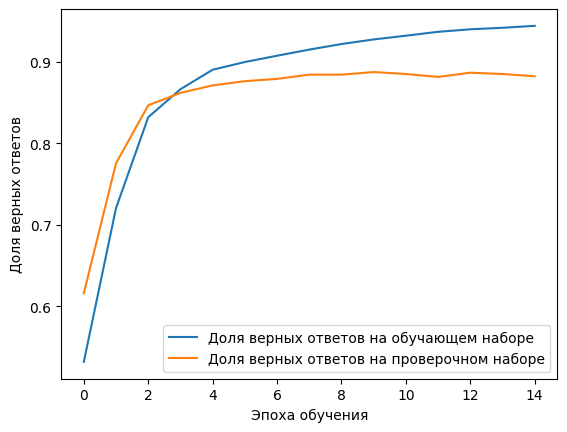

In [ ]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Загружаем модель с лучшей долей правильных ответов на проверочном наборе данных

In [ ]:
model.load_weights(model_save_path)

## Загружаем набор данных для тестирования

In [ ]:
test = pd.read_csv('yelp_review_polarity_csv/test.csv', 
                    header=None, 
                    names=['Class', 'Review'])

In [ ]:
test

,Class,Review
0,2,"Contrary to other reviews, I have zero complai..."
1,1,Last summer I had an appointment to get new ti...
2,2,"Friendly staff, same starbucks fair you get an..."
3,1,The food is good. Unfortunately the service is...
4,2,Even when we didn't have a car Filene's Baseme...
...,...,...
37995,1,If I could give 0...I would. Don't do it.
37996,2,Items Selected:\nChocolate Cinnamon Horn\nSmal...
37997,1,Expensive lunch meals. Fried pickles were goo...
37998,1,Highly overpriced and food was cold. Our waitr...


In [ ]:
x_test[5]

array([ 814,   13,  159,   49,  254,   12,   83,  798,  472,    1,  296,
         27,  123,  169,   20,  124,  581,    9,    5,   34,   46,   39,
          1,  798,   11, 1516,   63, 4383,    9,    1,  511,    4,   43,
          5, 4726,   39,  238, 1560,    4,   23,   67,  355,    8,   75,
         30,    5,   51,   46,   63,    1,  388,   31,    9,  729, 1967,
        442,   39,   20,  140,    4,    5,  295,    1,  511,   66,  458,
         76,   48,    4,    1,    2, 4808,    5,  110,    9,  173,    5,
         34, 5254,   20,   43,    1, 3857, 3857, 6479, 5467,  165,  118,
        450,  140,   13,   12,    2, 4073,   46,    4, 2296,   48, 3857,
       3857], dtype=int32)

Преобразуем отзывы в числовое представление

Обратите внимание, что нужно использовать токенизатор, обученный на наборе данных train.

In [ ]:
test_sequences = tokenizer.texts_to_sequences(test['Review'])

In [ ]:
x_test = pad_sequences(test_sequences, maxlen=max_review_len)

In [ ]:
x_test[:5]

array([[   9,    1,  546,  148,  274,  165,    2, 1221,    4,   14,  137,
          18,  289,   38, 8346, 2311,  257,  511,   28, 1167,    2,  113,
          60,  568,  520, 1426,   16,   11,   44,   31,   13,    3,   82,
          22,  249,   38,    3,  144,  173,  694, 2235,    7,   40,   72,
           7,   14,   80, 2540, 5951,   23,   69,    9,   21,   14,    7,
        1558,    2,   23, 1696,   14, 1894, 1775,  470,   17,   45,   14,
          52,    2, 1346, 5923,   95,   37,   69,   91, 1024,    2,  311,
          48,    4,   32,    4, 1480, 1037,   19,   40, 4124,    1,  317,
         127,    8,  562,    5,  203,  114,   99,    8,   90,   10, 1168,
         274],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,  182, 1243,    3,   24,
          59,  728,    4,   43,  159, 2073,    2,   24,    4,  154,    5,
         315,  190,   4

Правильные ответы

In [ ]:
y_test = test['Class'] - 1

In [ ]:
y_test

0        1
1        0
2        1
3        0
4        1
        ..
37995    0
37996    1
37997    0
37998    0
37999    0
Name: Class, Length: 38000, dtype: int64

## Оцениваем качество работы сети на тестовом наборе данных

In [ ]:
model.evaluate(x_test, y_test, verbose=1)

1188/1188 [==============================] - 65s 54ms/step - loss: 0.1528 - accuracy: 0.9395


[0.15278398990631104, 0.9394999742507935]

## Оцениваем тональность на собственном отзыве

In [ ]:
text = '''The SmartBurger restaurant is awful. It’s a small shabby place. 
The food is really bad and very expensive.  The host and waiters are rude. 
I will never visit the SmartBurger again!
'''

In [ ]:
sequence = tokenizer.texts_to_sequences([text])

In [ ]:
sequence

[[1,
  104,
  11,
  692,
  5,
  197,
  5272,
  31,
  1,
  29,
  11,
  61,
  143,
  2,
  42,
  502,
  1,
  1526,
  2,
  1713,
  28,
  401,
  3,
  66,
  88,
  285,
  1,
  108]]

In [ ]:
data = pad_sequences(sequence, maxlen=max_review_len)

In [ ]:
data

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    1,  104,   11,  692,    5,
         197, 5272,   31,    1,   29,   11,   61,  143,    2,   42,  502,
           1, 1526,    2, 1713,   28,  401,    3,   66,   88,  285,    1,
         108]], dtype=int32)

In [ ]:
result = model.predict(data)

1/1 [==============================] - 0s 495ms/step


In [ ]:
result

array([[0.00019145]], dtype=float32)

In [ ]:
if result[[0]] < 0.5:
    print('Отзыв отрицательный')
else:
    print('Отзыв положительный')


Отзыв отрицательный


# Задания для самостоятельной работы

1. Используйте сеть GRU вместо LSTM для определения тональности отзывов Yelp. Сравните скорость обучения и качество работы обученной сети.
2. Меняйте гиперпараметры нейросети, чтобы повысить качество работы:
  - Длину вектора представления слов в слое Embedding
  - Количество нейронов на рекуррентном слое (LSTM или GRU)
  - Количество рекуррентные слоев
  - Количество эпох обучения
  - Разрмер мини-выборки
3.Попробуйте применить вместо токенизатора Keras более совершенные(не обязательно) :
  - [spaCy Tokenizer](https://spacy.io/usage/spacy-101#annotations-token)
  - [Huggingface Tokenizers](https://github.com/huggingface/tokenizers)
4. Переделайте нейросеть для распознавания набора данных [Yelp reviews - Full](https://s3.amazonaws.com/fast-ai-nlp/yelp_review_full_csv.tgz), в котором 4 класса по количеству звезд у отзывов.

5. Решить аналогичную задачу "Определение тональности текста отзывов на фильмы IMDB с помощью рекуррентной нейронной сети", используя [набор данных IMDb movie review](https://ai.stanford.edu/~amaas/data/sentiment/)
  - Реализовать решение на обычных блоках RNN, LSTM, GRU и Bidirectional RNN
  - Сравнить результаты работы 